In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')

In [9]:
import pandas as pd

In [11]:
dataset = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 10s 1us/step


In [19]:
(x_train, y_train), (x_test, y_test) = dataset

(<matplotlib.image.AxesImage at 0x7fba54f9d610>, 5)

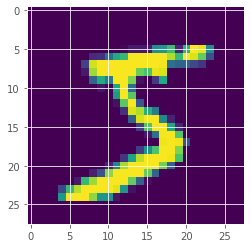

In [35]:
plt.imshow(x_train[0]), y_train[0]

In [36]:
x_train[0].shape

(28, 28)

In [38]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (x_train[0].shape)), 
                                   tf.keras.layers.Dense(128, activation = 'relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10, activation = 'softmax')])

In [40]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [43]:
model_ =  model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.6121 - accuracy: 0.7558 - val_loss: 0.4702 - val_accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5831 - accuracy: 0.8450 - val_loss: 0.3538 - val_accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4841 - accuracy: 0.8714 - val_loss: 0.3496 - val_accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4211 - accuracy: 0.8857 - val_loss: 0.3883 - val_accuracy: 0.9097
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3931 - accuracy: 0.8941 - val_loss: 0.2937 - val_accuracy: 0.9347
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.9012 - val_loss: 0.2806 - val_accuracy: 0.9361
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3546 - accuracy: 0.9064 - val_loss: 0.2808 - val_accuracy:

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.9435


[0.25927773118019104, 0.9434999823570251]

In [ ]:
#model give 94.34% accuracy

In [53]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
cm

array([[ 943,    0,    1,    0,    1,    3,    6,    2,   23,    1],
       [   0, 1093,    3,    3,    0,    2,    2,    1,   31,    0],
       [   2,    1,  974,   15,    4,    1,    1,    4,   30,    0],
       [   0,    0,   13,  951,    0,   16,    0,    5,   18,    7],
       [   0,    0,    3,    0,  934,    0,    1,    1,   10,   33],
       [   3,    0,    0,   23,    2,  838,    4,    0,   20,    2],
       [   4,    4,   11,    0,   19,   14,  891,    0,   15,    0],
       [   2,    3,   34,   13,    3,    0,    0,  944,    9,   20],
       [   1,    1,    3,    7,    9,   13,    3,    1,  924,   12],
       [   2,    4,    0,   15,   18,    2,    0,    4,   21,  943]])

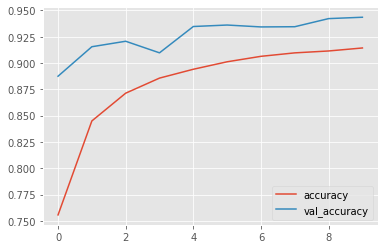

In [55]:
plt.plot(model_.history['accuracy'], label = 'accuracy')
plt.plot(model_.history['val_accuracy'], label = 'val_accuracy')
plt.legend()